# ELE510 Image Processing with robot vision: LAB, Exercise 3, Histogram and point transformations

**Purpose:** *To learn about the image histogram, histogram equalization and image noise.*

The theory for this exercise can be found in chapter 3 of the text book [1]. Supplementary information can found in chapter 1, 2 and 3 in the compendium [2]. See also the following documentations for help:
- [OpenCV](https://opencv.org/opencv-python-free-course/)
- [numpy](https://numpy.org/doc/stable/)
- [matplotlib](https://matplotlib.org/stable/contents.html)

**IMPORTANT:** Read the text carefully before starting the work. In
many cases it is necessary to do some preparations before you start the work
on the computer. Read necessary theory and answer the theoretical part
frst. The theoretical and experimental part should be solved individually.
The notebook must be approved by the lecturer or his assistant.

**Approval:**
<div class="alert alert-block alert-success">
The current notebook should be submitted on CANVAS as a single pdf file. 
</div>

<div class="alert alert-block alert-info">
    To export the notebook in a pdf format, goes to File -> Download as -> PDF via LaTeX (.pdf).
</div>

**Note regarding the notebook**: The theoretical questions can be answered directly on the notebook using a *Markdown* cell and LaTex commands (if relevant). In alternative, you can attach a scan (or an image) of the answer directly in the cell.

Possible ways to insert an image in the markdown cell:

`![image name]("image_path")`

`<img src="image_path" alt="Alt text" title="Title text" />`


**Under you will find parts of the solution that is already programmed.**

<div class="alert alert-block alert-info">
    <p>You have to fill out code everywhere it is indicated with `...`</p>
    <p>The code section under `######## a)` is answering subproblem a) etc.</p>
</div>

## Problem 1

The histogram for an image of a **black** and **white** football and **grey** background is
$[0,520,920,490,30,40,5910,24040,6050,80,20,80,440,960,420,0]$, where 16 gray levels are used. 

The diameter of the football is $d = 230\text{mm}$. 

Use these information to find the pixel size, $\Delta x = \Delta y$.

**Describe the steps to arrive to the solution.**

<details style="margin-top:20px">
    <summary>
        <font size="2" color="green"><b>Click here for an optional hint</b></font>
    </summary>
    1. The area of the ball is given by: $A = \pi \cdot (d/2)^2$ == (number_of_pixels $\cdot$ area_single_pixel)
</details>

### Solution:

In [53]:
import math

# Problem data
histogram = [0,520,920,490,30,40,5910,24040,6050,80,20,80,440,960,420,0]
d = 230

First, we need the area of the football:

In [63]:
histogram

A = math.pi*(d/2)**2
print("Area of the football: ", round(A, 2), "mm^2")

Area of the football:  41547.56 mm^2


We need the amount of pixels that corresponds to the football, the sum of the whole histogram is the number of pixels of the whole image. Notice in the histogram the middle levels of grey are very common, that's because they correspond to the background, we can discard those levels.

In [57]:
histogram = [g_lvl if g_lvl < 1000 else 0 for g_lvl in histogram]
print("Histogram of the football: ", histogram)

n_pix = sum(histogram)
print("Number of pixels that corresponds to the football: ", n_pix)

Histogram of the football:  [0, 520, 920, 490, 30, 40, 0, 0, 0, 80, 20, 80, 440, 960, 420, 0]
Number of pixels that corresponds to the football:  4000


We know the area of the football is given by: $A = \pi \cdot (d/2)^2$ == (number_of_pixels $\cdot$ area_single_pixel).

So the area of a single pixel must be: area_single_pixel = $A / $number_of_pixels

In [62]:
a_pix = A / n_pix
print("Area of a single pixel: ", round(a_pix, 2), "mm^2")

Δx = math.sqrt(a_pix)
Δy = Δx
print("Δx = Δy = ", round(Δx, 2), "mm")

Area of a single pixel:  10.39 mm^2
Δx = Δy =  3.22 mm


<div class="alert alert-block alert-info">
    <p>The solution of problem 1 should be:</p>
    
    Δx = Δy = 3.33mm or, if you have taken different level of gray into consideration, Δx = Δy = 3.22mm
</div>


## Problem 2

For images, such as `./images/christmas.png`, some processing is normally desired to improve the contrast. The simplest approach for doing this is called histogram stretching. For a given image, where the used pixel values range from $g_{\text{min}}$ to $g_{\text{max}}$ we can spread these so they cover the entire $[0, G-1]$ range. The formula for histogram stretching is given by:

\begin{equation*}
	g_{\text{new}} = \left\lfloor {\frac{g_{\text{old}}-g_{\text{min}}}{g_{\text{max}}-g_{\text{min}}}G + 0.5} \right\rfloor
\end{equation*}

Where $g_{\text{old}}$ is an old pixel value, and $g_{\text{new}}$ a new pixel value.

**a)** Make a small Python function, taking an image as input, perform histogram stretching using the previous equation, and giving the increased contrast image as output. Use an 8-bit grayscale range (G=256). Show and explain the result using `./images/christmas.png` as an example. 



In [2]:
# Import the packages
import cv2
import numpy as np
import matplotlib.pyplot as plt 

In [42]:
"""
Function that takes in input an image and return the same image stretched.
"""
def histogram_stretch(img):
    
    # Gets the minimun value of the image
    gmin = img.min()
    # Gets the maximun value of the image
    gmax = img.max()
    
    # Compute the stretched image
    img_new = ((img - gmin) / (gmax - gmin))*256 + 0.5
    # Change de dtype of the array so we can plot it as an image
    img_new = img_new.astype('int32')
    
    return img_new

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


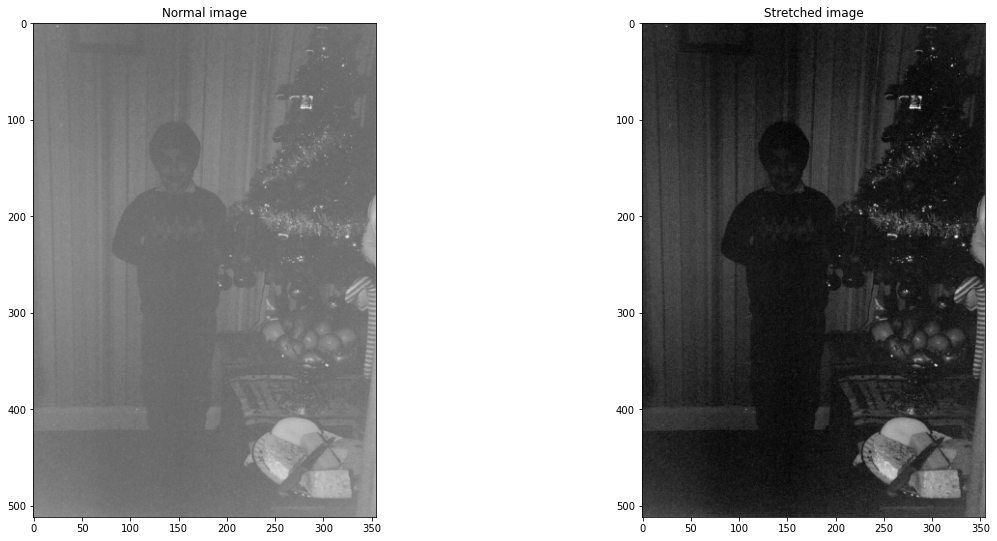

In [43]:
# Read the image and convert it to RGB channels
img = cv2.imread("./images/christmas.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Use the function to improve the contrast of the image
img_stretch = histogram_stretch(img)

plt.figure(figsize=(20,20))
plt.subplot(221)
plt.imshow(img)
plt.title('Normal image')
plt.subplot(222)
plt.imshow(img_stretch)
plt.title('Stretched image')
plt.show()



## Problem 3

In this experiment we use **four** images. 
The two first are gray level images, `./images/pout.jpg` and `./images/tire.jpg`. 
The other two are colour images captured with a standard digital camera. 
We want to study image enhancement with histogram equalization. 

*We simplify by using only gray level images*. 
Therefore, the colour images are first read to gray level; a grey level image can be imported using the flag (`cv2.IMREAD_GRAYSCALE`). 
The colour images are `./images/waterfall2.jpg` and `./images/restaurantSpain.jpg`, available from CANVAS.

<details style="margin-top:20px">
    <summary>
        <font size="2" color="green"><b>Click here for optional hints</b></font>
    </summary>
    <p>1. Make a Python function or script that do histogram equalization <code>cv2.equalizeHist</code>, </p>
    <p>2. computes the histograms <code>plt.hist</code> for both the input image and the output image, </p>
    <p>3. and displays both images with histograms in the same figure (use <code>plt.figure</code> and <code>plt.subplot</code>).</p>
</details>


**a)** Use Python and find the histograms for the images.


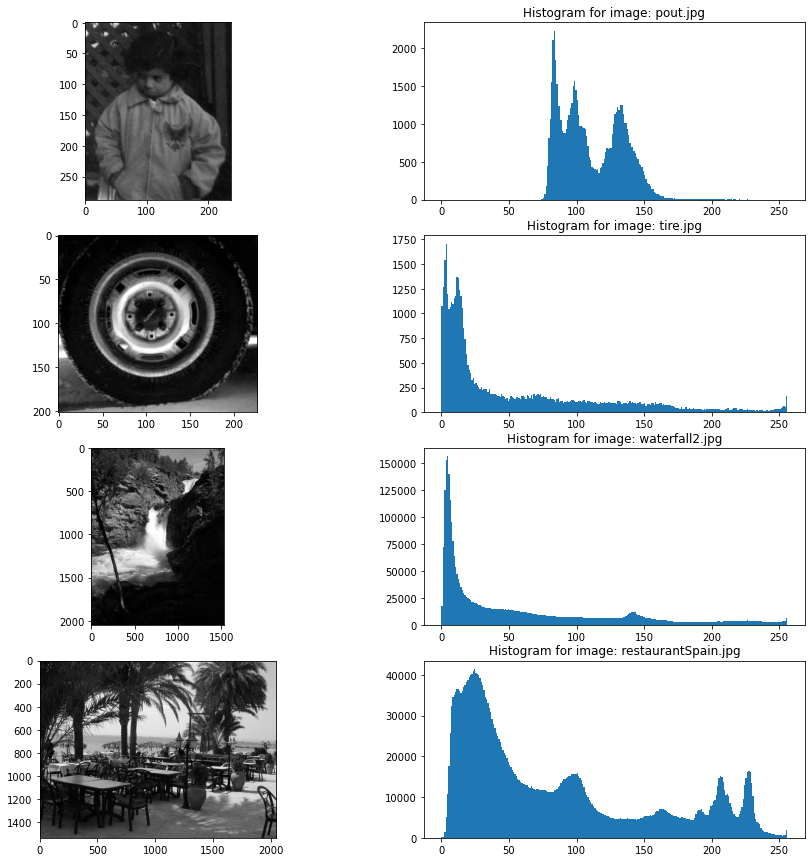

In [15]:
# Read the images
img_pout = cv2.imread("./images/pout.jpg", cv2.IMREAD_GRAYSCALE)
img_tire = cv2.imread("./images/tire.jpg", cv2.IMREAD_GRAYSCALE)
img_waterfall = cv2.imread("./images/waterfall2.jpg", cv2.IMREAD_GRAYSCALE)
img_spRest = cv2.imread("./images/restaurantSpain.jpg", cv2.IMREAD_GRAYSCALE)

# Plot histograms --> plt.hist
plt.figure(figsize=(15, 15))
plt.subplot(4,2,1)
plt.imshow(img_pout, cmap='gray')
plt.subplot(4,2,2)
plt.title("Histogram for image: pout.jpg")
plt.hist(img_pout.flatten(), 256, [0,256])

plt.subplot(4,2,3)
plt.imshow(img_tire, cmap='gray')
plt.subplot(4,2,4)
plt.title("Histogram for image: tire.jpg")
plt.hist(img_tire.flatten(), 256, [0,256])

plt.subplot(4,2,5)
plt.imshow(img_waterfall, cmap='gray')
plt.subplot(4,2,6)
plt.title("Histogram for image: waterfall2.jpg")
plt.hist(img_waterfall.flatten(), 256, [0,256])

plt.subplot(4,2,7)
plt.imshow(img_spRest, cmap='gray')
plt.subplot(4,2,8)
plt.title("Histogram for image: restaurantSpain.jpg")
plt.hist(img_spRest.flatten(), 256, [0,256])

plt.show()


**b)** Perform histogram equalization of these images and find the new histograms.


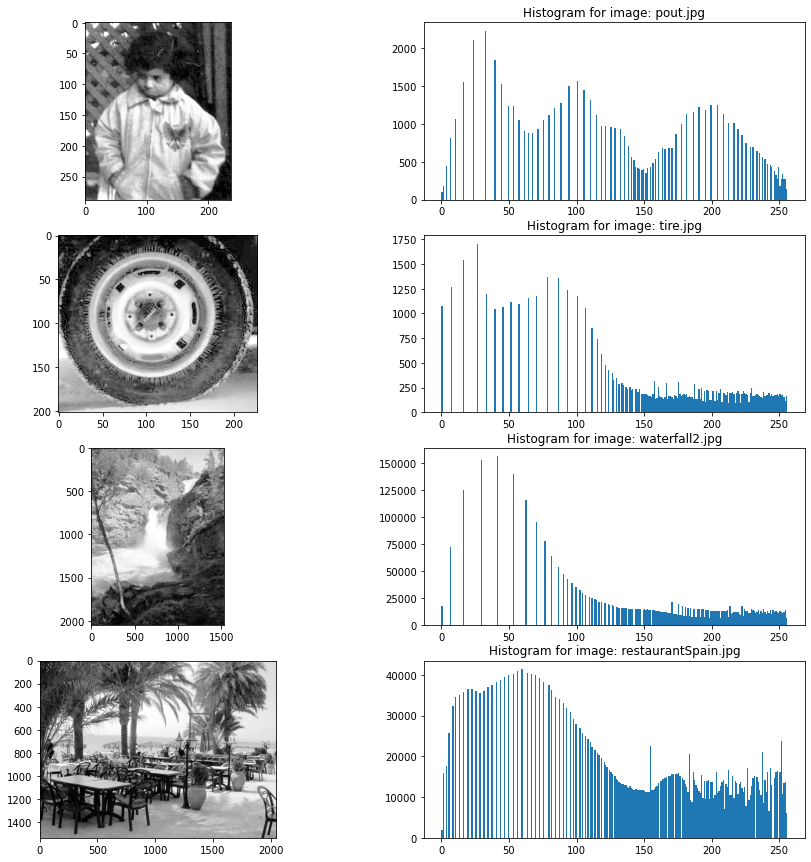

In [16]:
# Equalize the histograms
img_pout = cv2.equalizeHist(img_pout)
img_tire = cv2.equalizeHist(img_tire)
img_waterfall = cv2.equalizeHist(img_waterfall)
img_spRest = cv2.equalizeHist(img_spRest)


# Plot histograms --> plt.hist
plt.figure(figsize=(15, 15))
plt.subplot(4,2,1)
plt.imshow(img_pout, cmap='gray')
plt.subplot(4,2,2)
plt.title("Histogram for image: pout.jpg")
plt.hist(img_pout.flatten(), 256, [0,256])

plt.subplot(4,2,3)
plt.imshow(img_tire, cmap='gray')
plt.subplot(4,2,4)
plt.title("Histogram for image: tire.jpg")
plt.hist(img_tire.flatten(), 256, [0,256])

plt.subplot(4,2,5)
plt.imshow(img_waterfall, cmap='gray')
plt.subplot(4,2,6)
plt.title("Histogram for image: waterfall2.jpg")
plt.hist(img_waterfall.flatten(), 256, [0,256])

plt.subplot(4,2,7)
plt.imshow(img_spRest, cmap='gray')
plt.subplot(4,2,8)
plt.title("Histogram for image: restaurantSpain.jpg")
plt.hist(img_spRest.flatten(), 256, [0,256])

plt.show()


**c)** Discuss the results. Are the results as expected?


The results are very staisfying, we can appreciate all the elements in the image thanks to the equalization of the histogram. The new images have more distributed gray levels so all the elements on them are very easy to recognise, as a result, we obtain an increase on globla contrast.


**d)** Explain why the discrete histogram equalization usually do not give a completely flat histogram.

To equalize the histogram we use an aproximation of the probability density function, so as an effect of discretization we don't get a completely flat histogram, nevertheless, the results are good enough to assume this effect.


## Problem 4

Noise is a common problem in digital images. 
In this problem we want to study estimation of camera noise. 
We have a set of $K$ images. 
The only difference between the images is the noise value at each pixel. 

Assume that the noise is additive and uncorrelated with the gray values of the image such that for each image point we have
$g_{k} = f + \eta_{k},\, k = 1, 2, \;\cdots\;,K$, where $g_{k}$ is image number $k$ with noise $\eta_{k}$. 

The image without noise, $f$, is unchanged (here we have not shown the indexes $(x,y)$). 
The mean image is given by the average value:

\begin{equation}
    \overline{g(x,y)} = \frac{1}{K}\sum_{k = 1}^{K}g_{k}(x,y).
\end{equation}

Then it can be shown that
\begin{equation}\label{exc2-eq2}
    E\{\overline{g(x,y)}\} = f(x,y)
\end{equation}

and

\begin{equation}\label{exc2-eq3}
    \sigma^{2}_{\overline{g(x,y)}} =
    \frac{1}{K}\;\sigma^{2}_{\eta(x,y)}.
\end{equation}


**a)** Show how to derive these two results using the first equation and the information given in the text.


### Solution

We have $g_{k} = f + \eta_{k}$, so we can deduce on the mean image equation:

\begin{equation}
    \overline{g(x,y)}= \frac{1}{K}\sum_{k = 1}^{K}(f + \eta_{k})
\end{equation}

\begin{equation}
    \overline{g(x,y)} = \frac{1}{K}\sum_{k = 1}^{K}f + \frac{1}{K}\sum_{k = 1}^{K}\eta_{k}
\end{equation}

\begin{equation}
    \overline{g(x,y)} = \frac{1}{K}f*K + \frac{1}{K}\sum_{k = 1}^{K}\eta_{k}
\end{equation}

\begin{equation}
    \overline{g(x,y)} = f + \frac{1}{K}\sum_{k = 1}^{K}\eta_{k}
\end{equation}

\begin{equation}
    \eta_{k} \sim N(\mu, \sigma), \mu = 0 \implies \mu = \frac{1}{K}\sum_{k = 1}^{K}\eta_{k} = 0
\end{equation}

\begin{equation}
    \overline{g(x,y)} = f(x,y) + 0
\end{equation}

\begin{equation}
    E\{\overline{g(x,y)}\} = E\{f(x,y)\} \implies  E\{f(x,y)\} = f(x,y) \implies E\{\overline{g(x,y)}\} = f(x,y)
\end{equation}

For the second result we have that:

\begin{equation}
    \sigma^{2}_{\overline{g(x,y)}} =
    \frac{1}{K}\;\sigma^{2}_{\eta(x,y)}.
\end{equation}

So we want to get the left side of the equation starting with the right side of the equation.

\begin{equation}
    \sigma^{2}_{\overline{g(x,y)}} = Var(\overline{g(x,y)})
\end{equation}

\begin{equation}
    Var(\overline{g(x,y)}) = Var(\frac{1}{K}\sum_{k = 1}^{K}g_k)
\end{equation}

\begin{equation}
    g_{k} = f + \eta_{k} \implies 
    Var(\frac{1}{K}\sum_{k = 1}^{K}g_k) = Var(\frac{1}{K}\sum_{k = 1}^{K}(f + \eta_{k}))
\end{equation}

\begin{equation}
    Var(\frac{1}{K}\sum_{k = 1}^{K}(f + \eta_{k})) = 
    Var(\frac{1}{K}\sum_{k = 1}^{K}f + \frac{1}{K}\sum_{k = 1}^{K}\eta_{k}) = 
    Var(\frac{1}{K}fK + \frac{1}{K}\sum_{k = 1}^{K}\eta_{k})
\end{equation}

\begin{equation}
    Var(\frac{1}{K}fK + \frac{1}{K}\sum_{k = 1}^{K}\eta_{k}) = 
    Var(f + \frac{1}{K}\sum_{k = 1}^{K}\eta_{k})
\end{equation}

We know the image doesn't have noise, so we can assume $Var(f) = 0$

\begin{equation}
    Var(\frac{1}{K}\sum_{k = 1}^{K}\eta_{k}) = \frac{1}{K^2}Var(\sum_{k = 1}^{K}\eta_{k})
\end{equation}

In addition, since we know the noise is uncorrelated, we can say that the noise is the same for k = 1, 2, ... and this means the variance of the noise is a constant

\begin{equation}
    \frac{1}{K^2}Var(\sum_{k = 1}^{K}\eta_{k}) = 
    \frac{1}{K^2}\sum_{k = 1}^{K}Var(\eta) = 
    \frac{1}{K^2}K*Var(\eta)
\end{equation}

\begin{equation}
    Var(\overline{g(x,y)}) = \frac{1}{K}*Var(\eta)
\end{equation}

\begin{equation}
    \sigma^{2}_{\overline{g(x,y)}} = \frac{1}{K}\sigma^{2}_{\eta(x,y)}
\end{equation}



### Delivery (dead line) on CANVAS: 26.09.2021 at 23:59


## Contact
### Course teacher
Professor Kjersti Engan, room E-431,
E-mail: kjersti.engan@uis.no

### Teaching assistant
Tomasetti Luca, room E-401
E-mail: luca.tomasetti@uis.no


## References

[1] S. Birchfeld, Image Processing and Analysis. Cengage Learning, 2016.

[2] I. Austvoll, "Machine/robot vision part I," University of Stavanger, 2018. Compendium, CANVAS.